### Bancada de testes _offline_

In [1]:
import numpy as np
from META_TOOLBOX import *

In [2]:
# Input 
D = 8
X0 = {'X': [0, 1]}
X1 = {'X': [0, 1]}
X2 = {'X': [0, 1]}
X3 = {'X': [0, 1]}
X4 = {'X': [0, 1]}
X5 = {'X': [0, 1]}
X6 = {'X': [0, 1]}
X7 = {'X': [0, 1]}
DADOS_DISCRETOS = [X0, X1, X2, X3, X4, X5, X6, X7]

X_L = [0.0] * D
X_U = [1.0] * D
GAMMA = GAMMA_ASSEMBLY(X_L, X_U, D, 2)

PARAMETERS = {
              'BETA_0': 0.98,
              'ALPHA_MIN': 0.20,
              'ALPHA_MAX': 0.95,
              'GAMMA': GAMMA,
              'THETA': 0.98,
              'TYPE ALPHA UPDATE': 'YANG 0'
             }
             
SETUP_FA = { 
              'N_REP': 30,
              'N_ITER': 200,
              'N_POP': 20,
              'D': D,
              'X_L': X_L,
              'X_U': X_U,
              'PARAMETERS': PARAMETERS,
              'NULL_DIC': DADOS_DISCRETOS
            }

# OF statement
def OF_FUNCTION(X, NULL_DIC):
    DATA_DISCRETE = NULL_DIC
    X_NEW = CONVERT_CONTINUOUS_DISCRETE(X, DATA_DISCRETE)
    X_0 = X_NEW[0]
    X_1 = X_NEW[1]
    X_2 = X_NEW[2]
    X_3 = X_NEW[3]
    X_4 = X_NEW[4]
    X_5 = X_NEW[5]
    X_6 = X_NEW[6]
    X_7 = X_NEW[7]

    W_MAX = 1E6
    
    OF = (- (X_0 * 410E3 + X_1 * 330E3 + X_2 * 140E3 + X_3 * 250E3 + X_4 * 320E3 + X_5 * 320E3 + X_6 * 90E3 + X_7 * 190E3)) / 1E3
    G_0 =  ((X_0 * 470E3 + X_1 * 400E3 + X_2 * 170E3 + X_3 * 270E3 + X_4 * 340E3 + X_5 * 230E3 + X_6 * 50E3 + X_7 * 440E3) - W_MAX) / 1E3
    
    if X_0 == 1:
          G_1 = X_4
    else:
          G_1 = 0
    
    if X_1 == 1:
          G_2 = X_1 + X_3 - 2
    else:
          G_2 = 0
    
    PSEUDO_OF = OF + (np.maximum(0, G_0) ** 2 + G_1 ** 2 + G_2 ** 2) * 2 * 10 ** 6 
    #http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/
    
    return PSEUDO_OF
    
# Execução da otimização
RESULTS_REP_FA, BEST_REP_FA, AVERAGE_REP_FA, WORST_REP_FA, SATUS_FA = FIREFLY_ALGORITHM_001(OF_FUNCTION, SETUP_FA)

# Melhor resultado para as dimensões desejadas
BESTBEST_FA = SATUS_FA[0]
BEST = BEST_REP_FA[BESTBEST_FA]
AVERAGE = AVERAGE_REP_FA[BESTBEST_FA]
WORST = WORST_REP_FA[BESTBEST_FA]
DIMENSOES = list(BEST['X_POSITION'][-1,:])

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 16.00 Seconds 
 Seconds per repetition: 0.53
META_FA001_REP_0_BEST_0_20230203 102120.xlsx
META_FA001_REP_1_BEST_1_20230203 102120.xlsx
META_FA001_REP_2_BEST_2_20230203 102120.xlsx
META_FA001_REP_3_BEST_3_20230203 102120.xlsx
META_FA001_REP_4_BEST_4_20230203 102120.xlsx
META_FA001_REP_5_BEST_5_20230203 102120.xlsx
META_FA001_REP_6_BEST_6_20230203 102120.xlsx
META_FA001_REP_7_BEST_7_20230203 102120.xlsx
META_FA001_REP_8_BEST_8_20230203 102120.xlsx
META_FA001_REP_9_BEST_9_20230203 102120.xlsx
META_FA001_REP_10_BEST_10_20230203 102120.xlsx
META_FA001_REP_11_BEST_11_20230203 102120.xlsx
META_FA001_REP_12_BEST_12_20230203 102120.xlsx
META_FA001_REP_13_BEST_13_20230203 102120.xlsx
META_FA001_REP_14_BEST_14_20230203 102120.xlsx
META_FA001_REP_15_BEST_15_20230203 102121.xlsx
META_FA001_REP_16_BEST_16_20230203 102121.xlsx
META_FA001_REP_17_BEST_17_20230203 102121.xlsx
META_FA001_REP_18_BEST_18_20230203 1

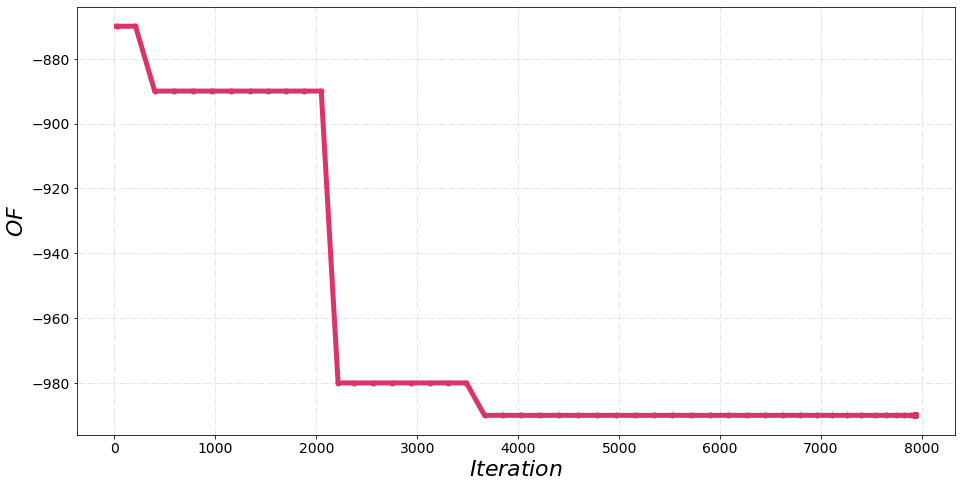

In [3]:
# Chart setup
CHART_SETUP = {   
               'NAME': 'WANDER',
               'WIDTH': 0.40, 
               'HEIGHT': 0.20, 
               'EXTENSION': 'svg',
               'DPI': 500, 
               'COLOR': '#DB3469',
               'MARKER': 'o',  
               'MARKER SIZE': 5,
               'LINE WIDTH': 5,
               'LINE STYLE': '-',
               'Y AXIS LABEL': '$OF$',
               'X AXIS LABEL': '$Iteration$',
               'LABELS SIZE': 22,
               'LABELS COLOR': '#000000',
               'X AXIS SIZE': 14,
               'Y AXIS SIZE': 14,
               'AXISES COLOR': '#000000',
               'Y LOG': False,
               'X LOG': False,
               'ON GRID?': True
              }

# Data
DATA = BEST_REP_FA[SATUS_FA[0]]
DATA_RESULTS = {'X': DATA['NEOF'], 'Y': DATA['OF']}

META_PLOT_002(DATA_RESULTS, CHART_SETUP)

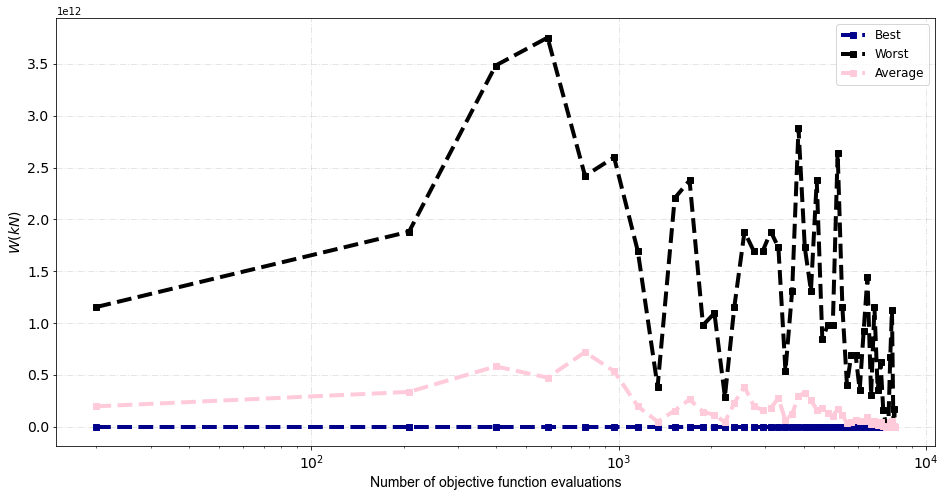

In [4]:
PLOT_SETUP = {
              'NAME': 'WANDER-OFBAW_SIM01',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR BEST': '#00008B',
              'COLOR WORST': '#000000',
              'COLOR AVERAGE': '#ffcbdb',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$W (kN)$',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'LOC LEGEND': 'upper right',
              'SIZE LEGEND': 12,
              'Y LOG': False,
              'X LOG': True
             }
DATASET = {'X': BEST['NEOF'], 'BEST': BEST['OF'], 'AVERAGE': AVERAGE['OF'], 'WORST': WORST['OF']}
META_PLOT_003(DATASET, PLOT_SETUP)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


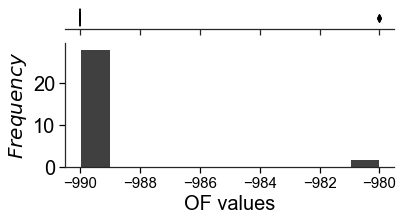

In [5]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF_HISTSIM01',
              'WIDTH': 0.15, 
              'HEIGHT': 0.075,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'MARKER': 's',
              'X AXIS LABEL': 'OF values',
              'X AXIS SIZE': 15,
              'Y AXIS SIZE': 20,
              'LABELS SIZE': 20,
              'LABELS COLOR': '#000000',
              'COLOR': '#000000',
              'AXISES COLOR': '#000000',
              'BINS': 10,
              'KDE': False,
             }
DATASET = {'NUMBER OF REPETITIONS': SETUP_FA['N_REP'], 'NUMBER OF ITERATIONS': SETUP_FA['N_ITER'], 'OF OR FIT': 'OF', 'BEST': BEST_REP_FA}
META_PLOT_004(DATASET, PLOT_SETUP)

In [6]:
DATA_DISCRETE = SETUP_FA['NULL_DIC']
X_NEW = CONVERT_CONTINUOUS_DISCRETE(DIMENSOES, DATA_DISCRETE)
X_NEW

[0, 1, 0, 1, 0, 1, 1, 0]

In [7]:
BEST['OF'][-1]

-990.0